#HOG + PCA + NN + SVM v2

In [1]:
import tensorflow as tf
DEVICES=tf.config.experimental.list_physical_devices()
print('GPU Availability : ',tf.test.is_gpu_available())
tf.config.experimental.set_memory_growth(device=DEVICES[1],enable=True)

GPU Availability :  True


In [2]:
import os
import cv2
import glob
#import h5py
import numpy as np 
import seaborn as sns
#from pathlib import Path
#from imutils import paths
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from skimage.feature import hog
from sklearn.decomposition import PCA , IncrementalPCA
#from sklearn.model_selection import GridSearchCV, train_test_split
from skimage import color, io, exposure, feature, util ,img_as_ubyte, transform

from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import RMSprop,Adam,SGD
#from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Activation, Dense, Flatten, Input, InputLayer, Dropout 

In [11]:
def HOG(imagePath):
    H=[]
    image = cv2.imread(imagePath)
    image = cv2.bitwise_not(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.3, tileGridSize=(8,8))
    image = clahe.apply(gray)
    img = cv2.resize(image, (160, 180)) 
    (H, hogImage) = hog(img, orientations=1, 
                        pixels_per_cell=(5,5), cells_per_block=(2,2), transform_sqrt=True, block_norm="L1", visualize=False) 
    #Data Normalisation (Normalising HOG Features)
    H*=10
    return H

In [12]:
basedir='./HOG_NN/mataji/Female/v2/'
basemodel=basedir+'model.h5'

In [13]:
#%%script false
data = []
labels = []
traindir='./path/Dataset/ghoshaala/MatajiGaushala'#Enter the Train Directory
for directory_path in glob.glob(traindir+"/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path,"*.png")):
        #print(img_path)
        A = HOG(img_path)
        data.append(A)
        labels.append(label)
np.save(basedir+'data.npy',data)
np.save(basedir+'labels.npy',labels)

3382


ValueError: too many values to unpack (expected 2)

In [6]:
data=np.load(basedir+'data.npy')
labels=np.load(basedir+'labels.npy')
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
le = preprocessing.LabelEncoder()
le.fit(labels)
toh= le.transform(labels)
OHE_labels=to_categorical(toh)
n_classes=OHE_labels.shape[1]
print(n_classes)

2187


In [12]:
print(data.shape)
print(labels.shape)
print(len(OHE_labels))
print(OHE_labels.shape)

(32804, 9408)
(32804,)
32804
(32804, 2187)


In [29]:
(trainX, testX, trainY, testY) = train_test_split(data, OHE_labels,
                                                  train_size=0.90,
                                                  random_state=12)
print(
      trainX.shape,'\n',
      testX.shape,'\n',
      trainY.shape,'\n',
      testY.shape,'\n'
      )

(14795, 7056) 
 (1644, 7056) 
 (14795, 1096) 
 (1644, 1096) 



In [86]:
from collections import Counter
print(*Counter(labels))

3382 3383 3384 3386 3389 3390 3391 3392 3393 3394 3396 3397 3399 3402 3403 3404 3407 3408 3409 3410 3411 3412 3413 3414 3415 3416 3417 3418 3419 3420 3421 3423 3424 3425 3426 3428 3429 3431 3432 3433 3434 3435 3436 3437 3438 3439 3441 3442 3443 3444 3445 3447 3449 3450 3451 3452 3454 3455 3456 3458 3460 3461 3462 3463 3464 3465 3468 3470 3471 3472 3473 3474 3475 3476 3477 3478 3479 3480 3481 3482 3483 3485 3487 3489 3490 3491 3493 3498 3499 3501 3502 3505 3508 3511 3513 3514 3515 3516 3519 3521 3522 3523 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3546 3549 3550 3551 3552 3553 3556 3557 3558 3559 3560 3561 3563 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3577 3578 3579 3582 3587 3588 3591 3593 3594 3595 3597 3598 3599 3600 3606 3610 3611 3612 3613 3614 3615 3616 3617 3619 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3636 3637 3638 3639 3640 3641 3643 3644 3645 3646 3647 3648 3651 3652 3656 3657 3658 3659 3660 3661 3662 

In [ ]:
from sklearn.decomposition import PCA
# First verfiy the ideal number of PCA components to not lose much information. 
# Try to retain 90% information, so look where the curve starts to flatten.
# Remember that the n_components must be lower than the number of rows or columns (features)
pca_test = PCA(n_components=3000) 
pca_test.fit(data)
#pca_test.fit(data)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cum variance")

In [7]:
#Pick the optimal number of components. This is how many features we will have 
#for our machine learning
n_PCA_components = 333
pca = PCA(n_components=n_PCA_components)
train_PCA = pca.fit_transform(data)
#test_PCA = pca.transform(testX) #Make sure you are just transforming, not fitting.

#If we want 90% information captured we can also try ...
#pca=PCA(0.9)
#train_PCA = pca.fit_transform(data)
#n_PCA_components = len(train_PCA)
#print(principalComponents.shape)
#test_PCA = pca.transform(data)

#import pickle as pk
#pk.dump(pca, open(basedir+"pca_data.pkl","wb"))

In [ ]:
'''n_PCA_components = 1008
pca = IncrementalPCA(n_components=n_PCA_components,batch_size=1008)
train_PCA = pca.fit_transform(data)
test_PCA = pca.transform(data)'''

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(n_PCA_components,)))
model.add(Dense(108,kernel_initializer='he_uniform',activation='sigmoid'))
model.add(Dense(1008,kernel_initializer='he_uniform',activation='sigmoid'))
model.add(Dropout(0.2)) 

#model.add(Dense(1008,activation='sigmoid'))
#model.add(Dense(1008,kernel_initializer='he_uniform',activation='relu'))
#model.add(Dense(1008,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(n_classes, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
model.summary()

In [27]:
model.load_weights(basemodel)

In [ ]:
model.pop()
model.add(Dense(n_classes, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
model.summary()

In [ ]:
Adam(
    learning_rate=0.0001,
    beta_1=0.79,
    beta_2=0.776,
    epsilon=9e-04,
    amsgrad=True,
    name="Adam", 
)

In [37]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model.load_weights(basedir+"model_333.h5")
checkpoint = ModelCheckpoint(basedir+"model_333.h5", 
                             monitor='categorical_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', 
                             #save_freq=1
                             )

early = EarlyStopping(monitor='categorical_accuracy', 
                      min_delta=0, 
                      patience=18, 
                      verbose=1, 
                      mode='auto')
Adam(
    learning_rate=0.001,
    beta_1=0.78,
    beta_2=0.776,
    epsilon=9e-04,
    amsgrad=True,
    name="Adam", 
)

tf.keras.optimizers.SGD(
    learning_rate=0.0001, momentum=0.2, name="SGD"
)

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'])

import datetime
start = datetime.datetime.now()
#Fit the model. Do not forget to use on-hot-encoded Y values. 
model.fit(train_PCA,OHE_labels,
          epochs=108, 
          #verbose=1,
          callbacks=[checkpoint]
          )
end = datetime.datetime.now()
print("Total execution time with PCA is: ", end-start)

Train on 32804 samples
Epoch 1/108
32800/32804 [============================>.] - ETA: 0s - loss: 6.6739 - categorical_accuracy: 0.8685
Epoch 00001: categorical_accuracy improved from -inf to 0.86846, saving model to ./HOG_NN/mataji/Female/v1/model_333.h5
32804/32804 [==============================] - 43s 1ms/sample - loss: 6.6739 - categorical_accuracy: 0.8685
Epoch 2/108
32768/32804 [============================>.] - ETA: 0s - loss: 6.6690 - categorical_accuracy: 0.8672 ETA: 4s - loss: 6.664 - ETA: 3s - loss: 6.6650 - 
Epoch 00002: categorical_accuracy did not improve from 0.86846
32804/32804 [==============================] - 38s 1ms/sample - loss: 6.6690 - categorical_accuracy: 0.8673
Epoch 3/108
32768/32804 [============================>.] - ETA: 0s - loss: 6.6644 - categorical_accuracy: 0.8685
Epoch 00003: categorical_accuracy did not improve from 0.86846
32804/32804 [==============================] - 41s 1ms/sample - loss: 6.6645 - categorical_accuracy: 0.8685
Epoch 4/108
32768/

KeyboardInterrupt: 

In [73]:
test_PCA = pca.transform(data) #Make sure you are just transforming, not fitting.
#Predict on test dataset
predict_test = model.predict(test_PCA)
predict_test = np.argmax(predict_test, axis=1)
predict_test = le.inverse_transform(predict_test)

In [74]:
##Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(labels, predict_test))

Accuracy =  1.0


__Prediction Report__

<AxesSubplot:>

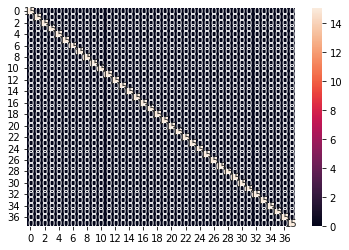

In [75]:
#Confusion Matrix - verify accuracy of each class - Do not do it for classes more than 30
from sklearn.metrics import confusion_matrix
#testY=str(testY)
cm = confusion_matrix(labels, predict_test)
#print(cm)
sns.heatmap(cm, annot=True)

In [80]:
#Check results on a few select images
n=np.random.randint(0,data.shape[0])
print(n)
val = data[n]
print(val.shape)
x = np.expand_dims(val, axis=0) #Expand dims so the input is (num images, x, y, c)
print(x.shape)
# #Expand dims so the input is (num images, x, y, c)
input_img_feature=x
input_img_PCA = pca.transform(input_img_feature)
prediction_img = model.predict(input_img_PCA)
prediction_img = np.argmax(prediction_img, axis=1)
print(prediction_img)
prediction_img = le.inverse_transform(prediction_img)  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_img)
print("The actual label for this image is: ", labels[n])

365
(9408,)
(1, 9408)
[24]
The prediction for this image is:  ['4220']
The actual label for this image is:  4220


In [77]:
SIZE=256
imagepath='./path/Dataset/Vrindhaavan_overall_backup/Vrindavan_overall/1464/Chatshikhar_Cow_Female_13.png'
H=HOG(imagepath,SIZE)
x = np.expand_dims(H, axis=0)
input_img_feature=x
input_img_PCA = pca.transform(input_img_feature)
prediction_img = model.predict(input_img_PCA)
prediction_img = np.argmax(prediction_img, axis=1)
print(prediction_img)
prediction_img = le.inverse_transform(prediction_img)  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_img)
#print("The actual label for this image is: ", test_labels[n])

TypeError: HOG() takes 1 positional argument but 2 were given

In [ ]:
from tensorflow.keras import Model
SIZE=256
imagepath='./path/Dataset/Vrindhaavan_overall_backup/Vrindavan_overall/1464/Chatshikhar_Cow_Female_13.png'
H=HOG(imagepath,SIZE)
x = np.expand_dims(H, axis=0)
input_img_feature=x
input_img_PCA = pca.fit_transform(input_img_feature)
all_model=load_('./Vrindhavan_Overall_sukirti.h5')
prediction_img = all_model.predict(input_img_PCA)
prediction_img = np.argmax(prediction_img, axis=1)
print(prediction_img)
prediction_img = le.inverse_transform(prediction_img)  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_img)
#print("The actual label for this image is: ", test_labels[n])